In [29]:
import numpy as np


class LinearRegression:
  def __init__(self,**kwargs):
    self.coef_ = None

  def fit(self, x: np.array, y: np.array):
    x=x[np.newaxis, :].T
    y=y[np.newaxis, :].T
    b=np.ones(len(x))
    b=b[np.newaxis, :].T
    X=np.concatenate((x, b), axis=1)
    matr=np.matmul(X.T, X)
    matr=np.linalg.inv(matr)
    matr=np.matmul(matr, X.T)
    self.coef_=np.matmul(matr,y)

  def predict(self, x: np.array):
    x=x[np.newaxis, :].T
    b=np.ones(len(x))
    b=b[np.newaxis, :].T
    X=np.concatenate((x, b), axis=1)
    ans=[]
    for x in X :
      ans.append(np.matmul(x, self.coef_))
    return np.array(ans)

Создадим выборку, чтобы проверить работу алгоритма

In [21]:
np.random.seed(42)
sample_size = 100
X = np.random.uniform(-10, 10, sample_size)
mean = 0
std_dev = 1
eps = np.random.normal(mean, std_dev, sample_size)
Y = 1/3*X+3 + eps
#print(eps)

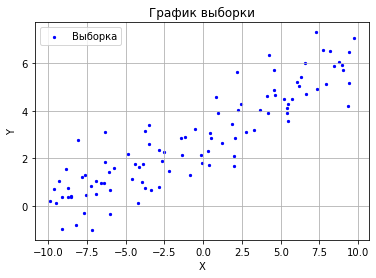

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, s=5, c='b', label='Выборка')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График выборки')
plt.legend()
plt.grid(True)
plt.show()

Проверим работу алгоритма

In [30]:
model=LinearRegression()
model.fit(X, Y)

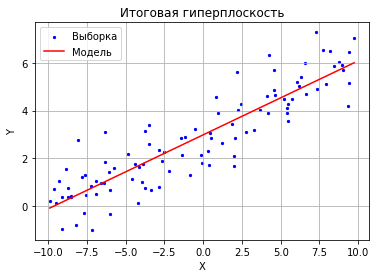

In [31]:
X_plot = np.linspace(min(X), max(X), 1000)
Y_plot = model.predict(X_plot)
plt.scatter(X, Y, s=5, c='b', label='Выборка')
plt.plot(X_plot, Y_plot, color='r', label='Модель')
plt.title(f'Итоговая гиперплоскость')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
print(model.coef_)

[[0.31034467]
 [2.98520954]]


Оцененные коэффициенты приблизительно равны 1/3 и 3, что говорит о хорошей подгонке.

In [32]:
test=np.array([-5, 0, 2 , 3])
print(model.predict(test))

[[1.43348618]
 [2.98520954]
 [3.60589889]
 [3.91624356]]
